 # Feature Engineering
 Build some useful & predictive features and eliminate features we can't use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/clean_data.csv", index_col=[1,2])
plays = data.loc[data.IsRusher,:]


 The data cleaning script doesn't actually provide whether each player is on
 the offensive or defensive side of the ball... fortunately it gives us the
 tools to find that without too much trouble.

In [2]:
data['IsOffense'] = data.HomePossession == data.Team


 We also don't have a field that consistently finds the distance from the
 offense to the goal. We can engineer that too, using `Field_eq_Possession`
 which *seems* to tell us whether the offense is on their own side of the
 field, allowing us to transform `YardLine` appropriately.

In [3]:
# Efficient adjusted yardline field
data['YardLine_adj'] = data.YardLine
updated = 100 - data.loc[~data.Field_eq_Possession, 'YardLine']
data.loc[~data.Field_eq_Possession, 'YardLine_adj'] = updated


 One might be tempted to assume that this is what `YardsLeft` indicates, but it
 actually doesn't. YardsLeft does not handle the reversal of the field well. We
 know that the `YardLine_adj` field is correct because I've cross-referenced it
 with the X/Y position data in another notebook.

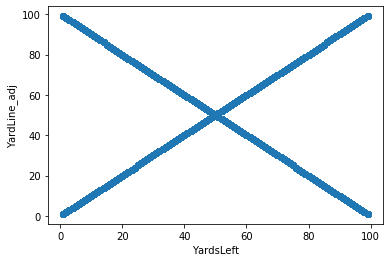

In [4]:
plays = data.loc[data.IsRusher,:]

plt.scatter(plays.YardsLeft, plays.YardLine_adj)
plt.xlabel("YardsLeft")
plt.ylabel("YardLine_adj")

plt.show()


 Another issue we have is that the X position data is extremely noisy, since it
 most strongly correlates with the position of the line of scrimmage. By
 normalizing around the line of scrimmage, we can calculate instead each
 player's position relative to the line, which is likely much more predictive.

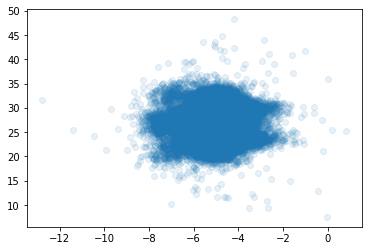

In [5]:
data["X_adj"] = data.X - (data.YardLine_adj + 10)
plt.scatter(data.loc[data.IsRusher, "X_adj"], data.loc[data.IsRusher, "Y"], alpha=0.1)
plt.show()


 We also have a lot of fields that we know are not going to be predictive.
 Let's drop them to produce a clean dataframe.

In [6]:
drop_cols = [
    "X",
    "DisplayName",
    "JerseyNumber",
    "PossessionTeam",
    "FieldPosition",
    "OffensePersonnel",
    "DefensePersonnel",
    "PlayerCollegeName",
    "Position",
    "HomeTeamAbbr",
    "VisitorTeamAbbr",
    "Stadium",
    "Location",
    "StadiumType",
    "Turf",
    "GameWeather",
]

na_cols = [
    "Temperature",
    "Humidity",
    "WindSpeed",
    "WindDirection"
]


clean = data.drop(drop_cols + na_cols, axis=1)
clean = clean.dropna()
plays = clean.loc[clean.IsRusher,:]

clean.head()


Unnamed: 0   Team      Y     S     A   Dis  \
GameId     PlayId                                                       
2017090700 20170907000118           0  False  34.84  1.69  1.13  0.40   
           20170907000118           1  False  32.64  0.42  1.35  0.01   
           20170907000118           2  False  33.20  1.22  0.59  0.31   
           20170907000118           3  False  27.70  0.42  0.54  0.02   
           20170907000118           4  False  35.42  1.82  2.43  0.16   

                           Orientation     Dir  Season  YardLine  ...  \
GameId     PlayId                                                 ...   
2017090700 20170907000118       278.01  182.82    2017        35  ...   
           20170907000118       332.39  161.30    2017        35  ...   
           20170907000118       356.99  157.27    2017        35  ...   
           20170907000118         0.23  254.36    2017        35  ...   
           20170907000118       347.37  195.69    2017        35  ...   

                           Formation_SINGLEBACK  Formation_WILDCAT  PlayerBMI  \
GameId     PlayId                                                               
2017090700 20170907000118                     0                  0  28.749228   
           20170907000118                     0                  0  35.993600   
           20170907000118                     0                  0  33.744000   
           20170907000118                     0                  0  30.619556   
           20170907000118                     0                  0  27.935571   

                           TimeDelta  PlayerAge  IsRusher  YardsLeft  \
GameId     PlayId                                                      
2017090700 20170907000118        1.0  28.692760     False         35   
           20170907000118        1.0  28.457305     False         35   
           20170907000118        1.0  28.629790     False         35   
           20170907000118        1.0  34.795430     False         35   
           20170907000118        1.0  30.061685     False         35   

                           IsOffense  YardLine_adj  X_adj  
GameId     PlayId                                          
2017090700 20170907000118      False            35   1.09  
           20170907000118      False            35   0.33  
           20170907000118      False            35   1.00  
           20170907000118      False            35   3.54  
           20170907000118      False            35   5.68  

[5 rows x 42 columns]

 We'll just dump this data to do predictions elsewhere.

In [7]:
clean.to_csv("../data/fe_data.csv")
